In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tkinter import Tk, filedialog

In [2]:
demented=glob(r'C:\Users\adith\Downloads\new alzhimers file\Alzheimers Disease\Demented\*.jpg')
nondemented=glob(r'C:\Users\adith\Downloads\new alzhimers file\Alzheimers Disease\NonDem\*.jpg')

In [3]:
print(f"Number of images present in training set are: demented: {len(demented)}, not demented: {len(nondemented)}")

Number of images present in training set are: demented: 3200, not demented: 3200


In [4]:
classes = {0:'Demented', 1: 'Non Demented'}

In [5]:
images = []
labels = []

for i in demented:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in nondemented:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

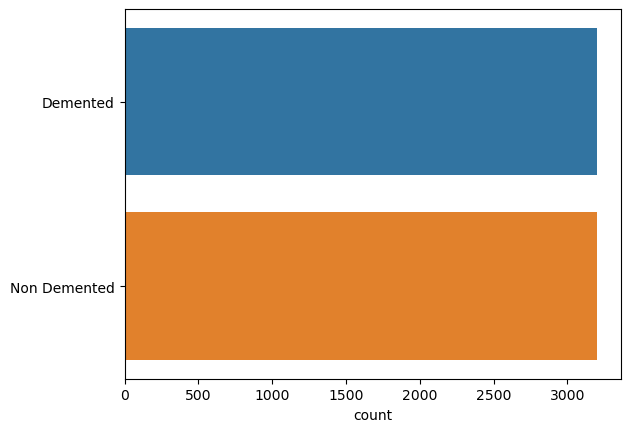

In [6]:
sns.countplot(y = [classes[i] for i in labels])
plt.show()

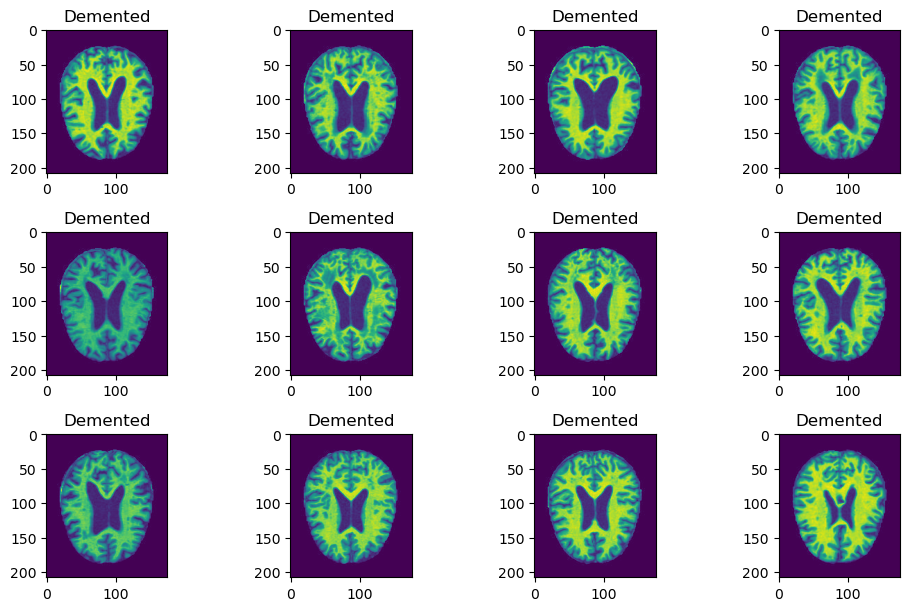

In [9]:
plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [10]:
X = []

for i in images:
    X.append(resize(i, (200,200)))

In [11]:
X = np.array(X)
y = np.array(labels)

In [12]:
X,y = shuffle(X,y)

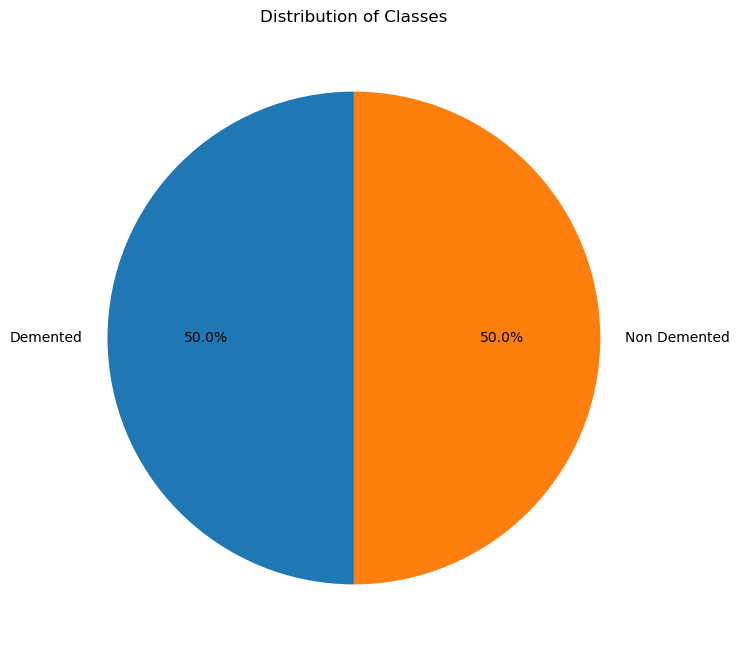

In [13]:
class_counts = np.bincount(y)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=[classes[i] for i in range(len(class_counts))], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.show()

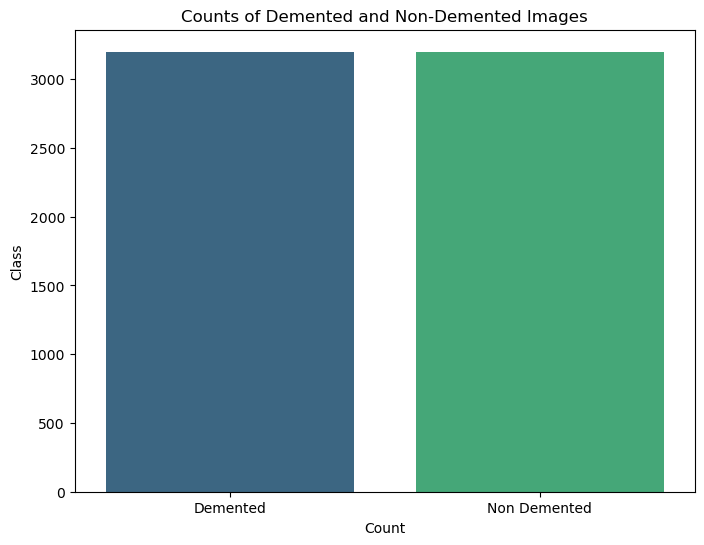

In [15]:
class_counts = np.bincount(y)

# Plot a bar chart with x and y axes interchanged
plt.figure(figsize=(8, 6))
sns.barplot(y=class_counts, x=[classes[i] for i in range(len(class_counts))], palette="viridis")
plt.title('Counts of Demented and Non-Demented Images')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()

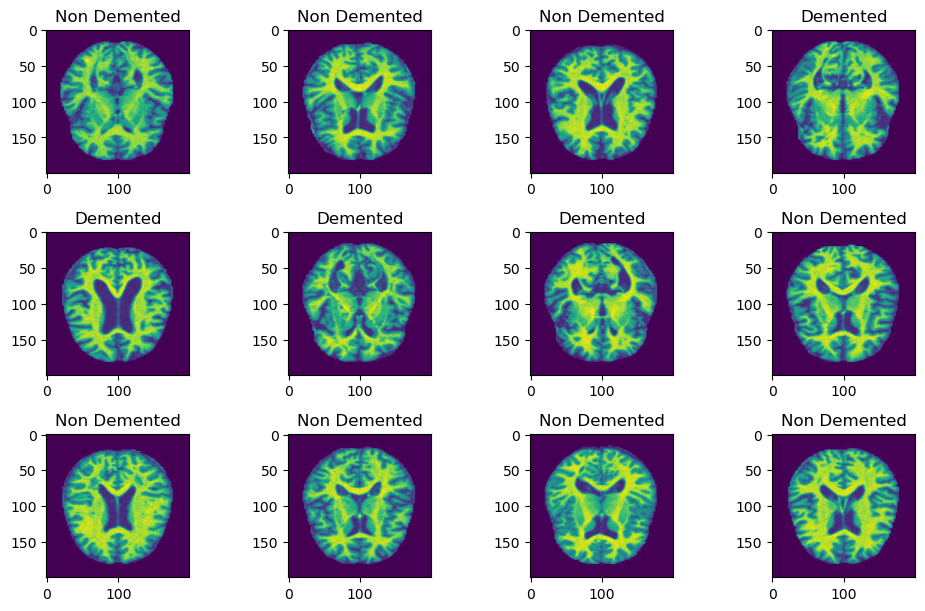

In [16]:
plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i])
    plt.title(classes[y[i]])
plt.tight_layout()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [18]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu',kernel_initializer="he_normal", input_shape = (200,200,1)),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(32,(3,3),kernel_initializer="he_normal", activation = 'relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    
    layers.Dropout(0.25),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
])

In [19]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dropout (Dropout)           (None, 73728)             0

In [21]:
%time model.fit(X_train,y_train, epochs=15, validation_split=0.1)

Epoch 1/15
144/144 [==============================] - 64s 435ms/step - loss: 0.7646 - accuracy: 0.6395 - val_loss: 0.5176 - val_accuracy: 0.7637
Epoch 2/15
144/144 [==============================] - 65s 452ms/step - loss: 0.4204 - accuracy: 0.8069 - val_loss: 0.3417 - val_accuracy: 0.8574
Epoch 3/15
144/144 [==============================] - 62s 429ms/step - loss: 0.2625 - accuracy: 0.8941 - val_loss: 0.2104 - val_accuracy: 0.9082
Epoch 4/15
144/144 [==============================] - 65s 452ms/step - loss: 0.1665 - accuracy: 0.9373 - val_loss: 0.1723 - val_accuracy: 0.9375
Epoch 5/15
144/144 [==============================] - 63s 435ms/step - loss: 0.1140 - accuracy: 0.9575 - val_loss: 0.3429 - val_accuracy: 0.8613
Epoch 6/15
144/144 [==============================] - 62s 434ms/step - loss: 0.0824 - accuracy: 0.9701 - val_loss: 0.0865 - val_accuracy: 0.9727
Epoch 7/15
144/144 [==============================] - 63s 436ms/step - loss: 0.0679 - accuracy: 0.9733 - val_loss: 0.1437 - val_ac

In [22]:
y_pred = model.predict(X_test)

40/40 [==============================] - 3s 76ms/step


In [23]:
y_pred = [np.argmax(i) for i in y_pred]

In [24]:
accuracy_score(y_test, y_pred)

0.984375

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
confusion_matrix(y_test,y_pred)

array([[641,   3],
       [ 17, 619]], dtype=int64)

<Axes: >

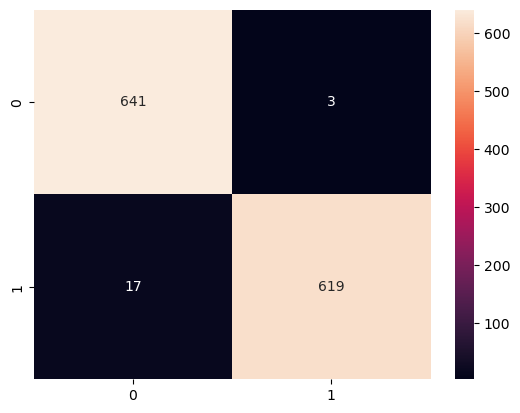

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True,fmt='d')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       644
           1       1.00      0.97      0.98       636

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



In [23]:
def Make_Prediction():
    root = Tk()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", ".jpg")])
    root.withdraw()
    
    images = []
    img = plt.imread(file_path)
    img = resize(img, (200,200))
    images.append(img)
        
    images = np.array(images)
    predictions = model.predict(images)
    predictions = [classes[np.argmax(i)] for i in predictions]
    plt.imshow(img)
    plt.title(f"Predicted = {predictions[0]}")

1/1 [==============================] - 0s 30ms/step


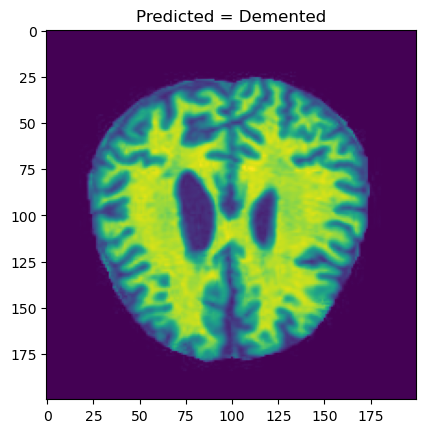

In [26]:
Make_Prediction()